In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
subj=27
space='electrodeSpace'
session=1
band='gamma'

In [48]:
prova=np.load('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(session)+'/topological_clf/'+band+'perf_intensity.npy')[0,1]
prova

array([0.7265625, 0.8515625, 0.7734375, 0.8046875, 0.7421875, 0.75     ,
       0.7578125, 0.796875 , 0.8125   , 0.75     ])

In [2]:
subjects=list(range(25,36)) 
bands=[-1,0,1,2] 
sessions=list(range(1,3))
space='electrodeSpace'
band_dic={-1: 'noFilter', 0:'alpha',1:'beta',2:'gamma'} 

FileNotFoundError: [Errno 2] No such file or directory: 'results/intensities/subject_31/electrodeSpace/beta/session1/topological_clf/betaperf_intensity.npy'

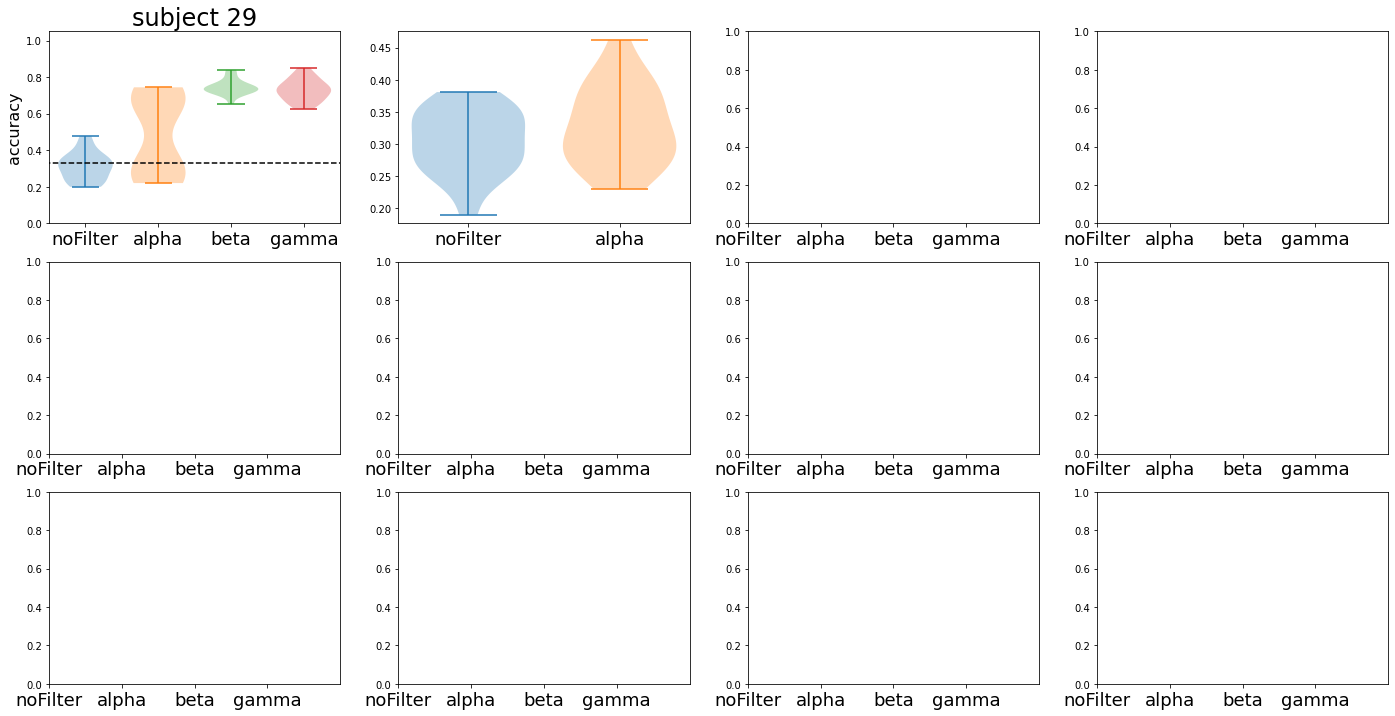

In [6]:

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 12))
plt.rcParams['xtick.labelsize']=18
subj=25
for i in range(3):
    for j in range(4):
        if j==4 and i==3:
            continue
        perf=np.zeros((4,2,10))
        k=0
        for b in bands:
            band=band_dic[b]
            temp1=np.load('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(1)+'/topological_clf/'+band+'perf_intensity.npy')[0,1]
            temp2=np.load('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(2)+'/topological_clf/'+band+'perf_intensity.npy')[0,1]
            if temp1.sum()==0:
                temp=temp2
            elif temp2.sum==0:
                temp=temp1
            else:
                temp=np.concatenate((temp1,temp2),axis=0)
            axes[i][j].violinplot(temp,positions=[-0.6+k*0.4],widths=[0.3])
            subj=subj+1
            k=k+1


        axes[i][j].plot([-1,2],[0.33]*2,'--k')
        axes[i][j].axis(xmin=-0.8,xmax=0.8,ymin=0,ymax=1.05)
        axes[i][j].set_ylabel('accuracy',fontsize=16)
        axes[i][j].set_title('subject '+str(subj),fontsize=24)

        plt.setp(axes,xticks=[-0.6,-0.2,0.2, 0.6],xticklabels=band_dic.values())

fig.suptitle('Accuracies for different subjects and frequancy bands',fontsize=36)
plt.show()
